In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('Property Prices in Tunisia.csv')
data


,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449
...,...,...,...,...,...,...,...,...,...
12743,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,3200000.0,Tunis,Sidi Bou Said,6.505150
12744,Appartements,1.0,1.0,100.0,À Louer,600.0,Tunis,Autres villes,2.778151
12745,Maisons et Villas,3.0,1.0,760.0,À Vendre,1950000.0,Tunis,La Marsa,6.290035
12746,Maisons et Villas,3.0,1.0,190.0,À Vendre,240000.0,Tunis,La Marsa,5.380211


In [3]:
report_v1 = pandas_profiling.ProfileReport(data)

In [4]:
report_v1.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='log_price'>

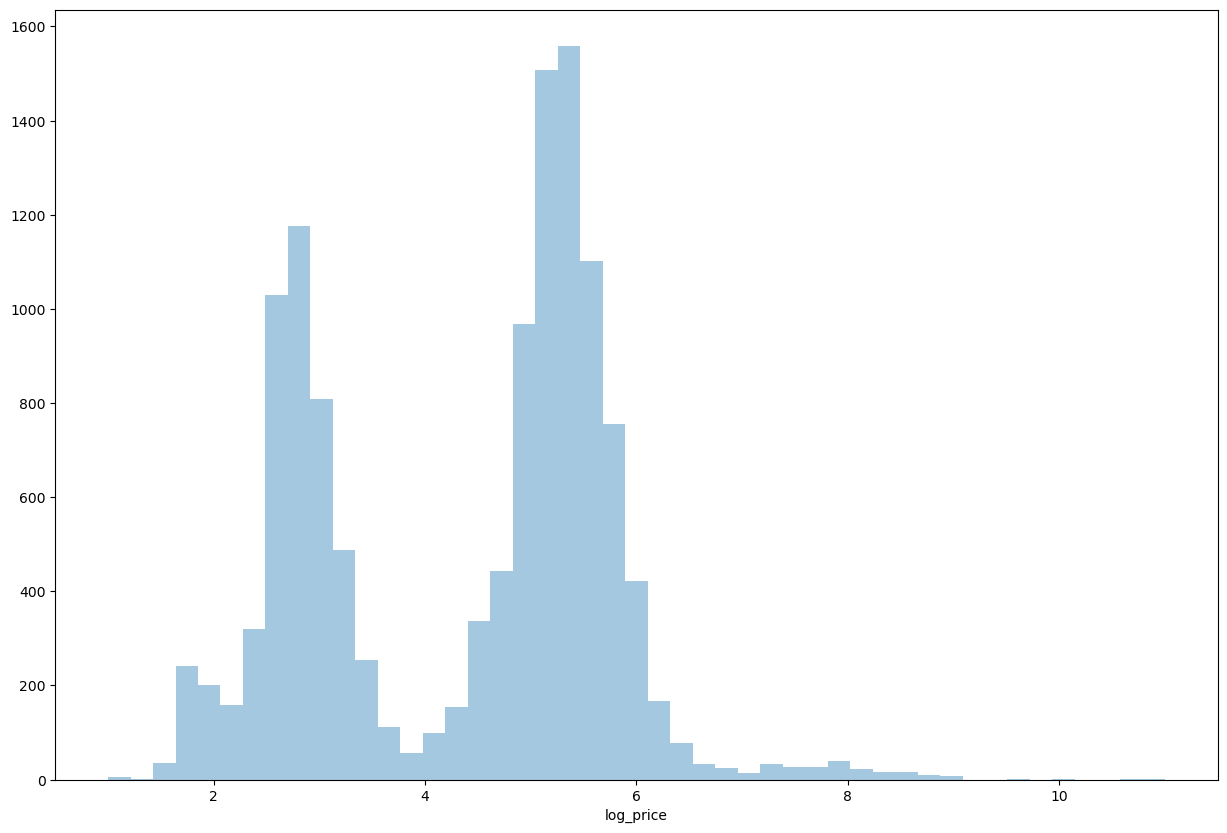

In [5]:
plt.figure(figsize=(15,10))
sns.distplot(data.log_price,kde=False)

<AxesSubplot:xlabel='type', ylabel='log_price'>

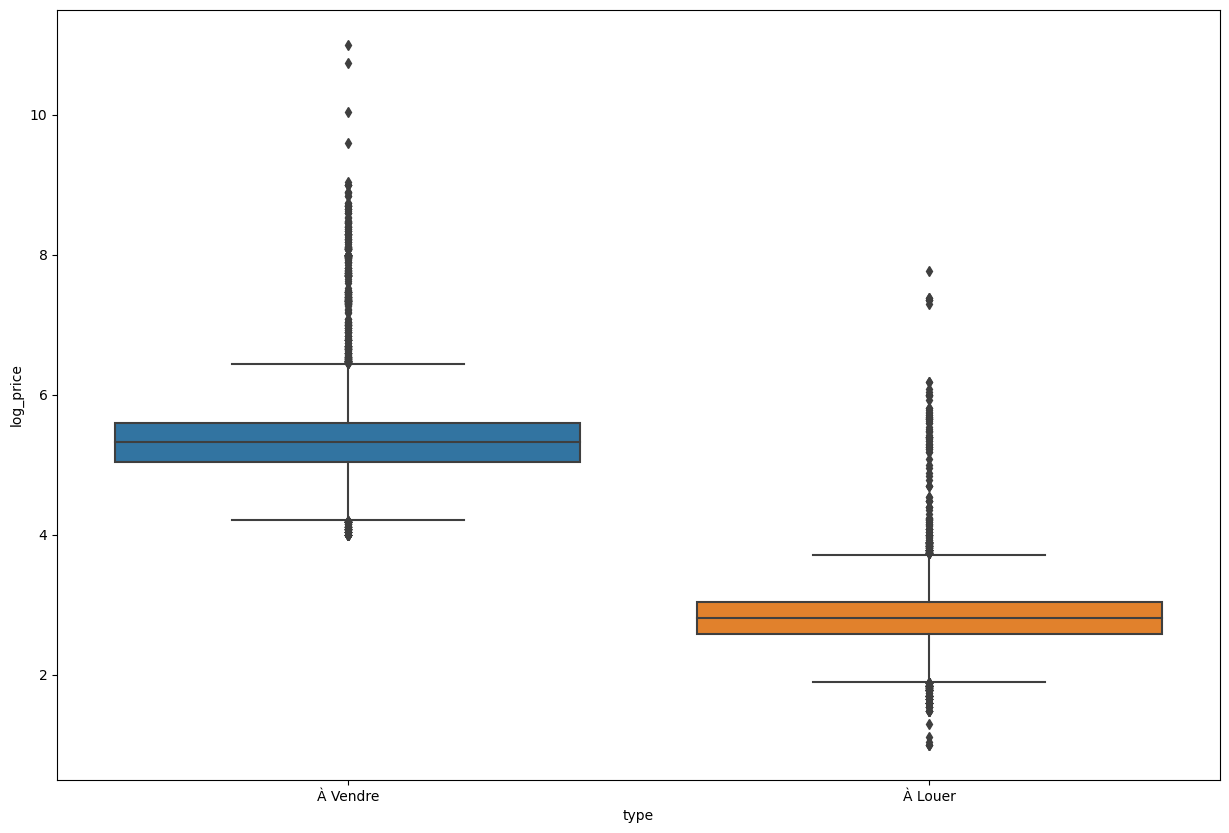

In [6]:
plt.figure(figsize=(15,10))
sns.boxplot(x='type',y='log_price', data=data)

<AxesSubplot:xlabel='count', ylabel='city'>

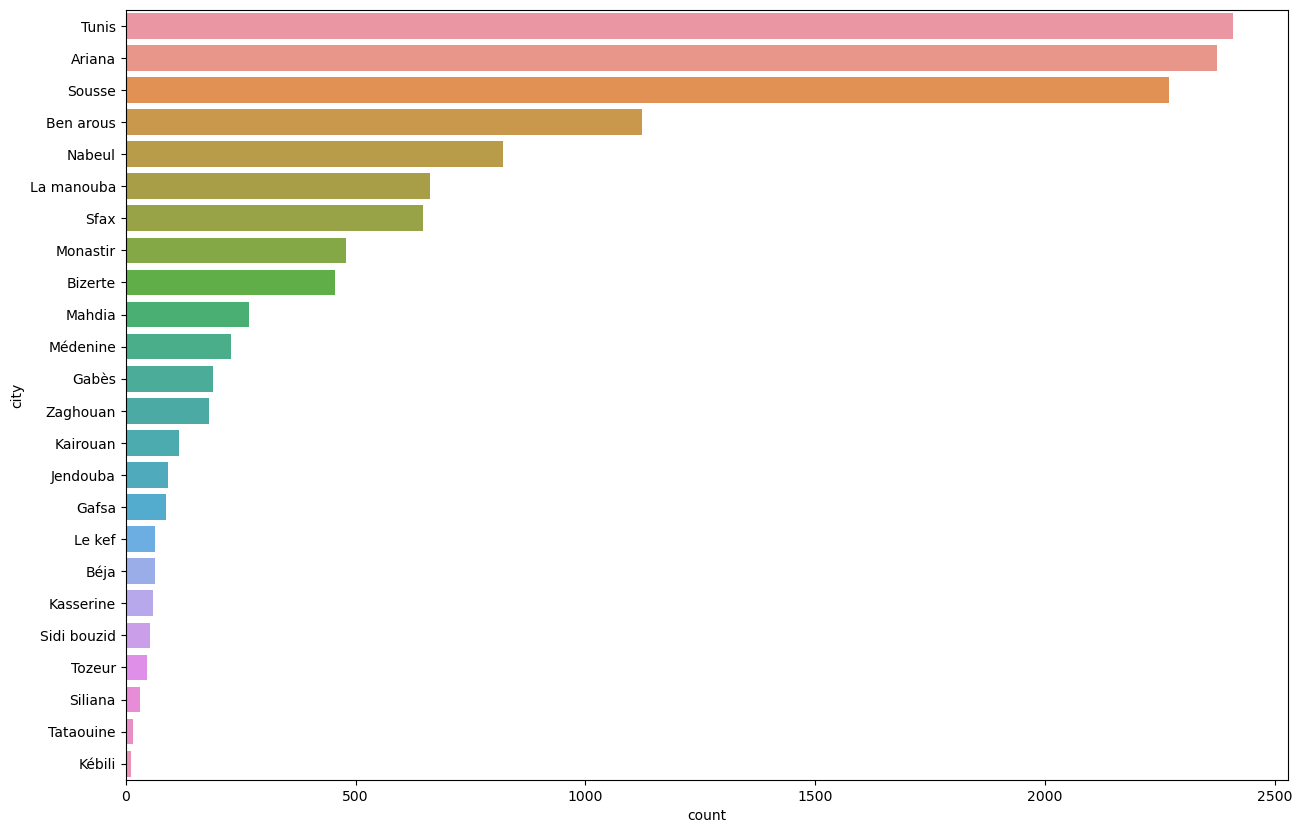

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(y='city', data=data, order=data.city.value_counts().index)

<AxesSubplot:xlabel='count', ylabel='category'>

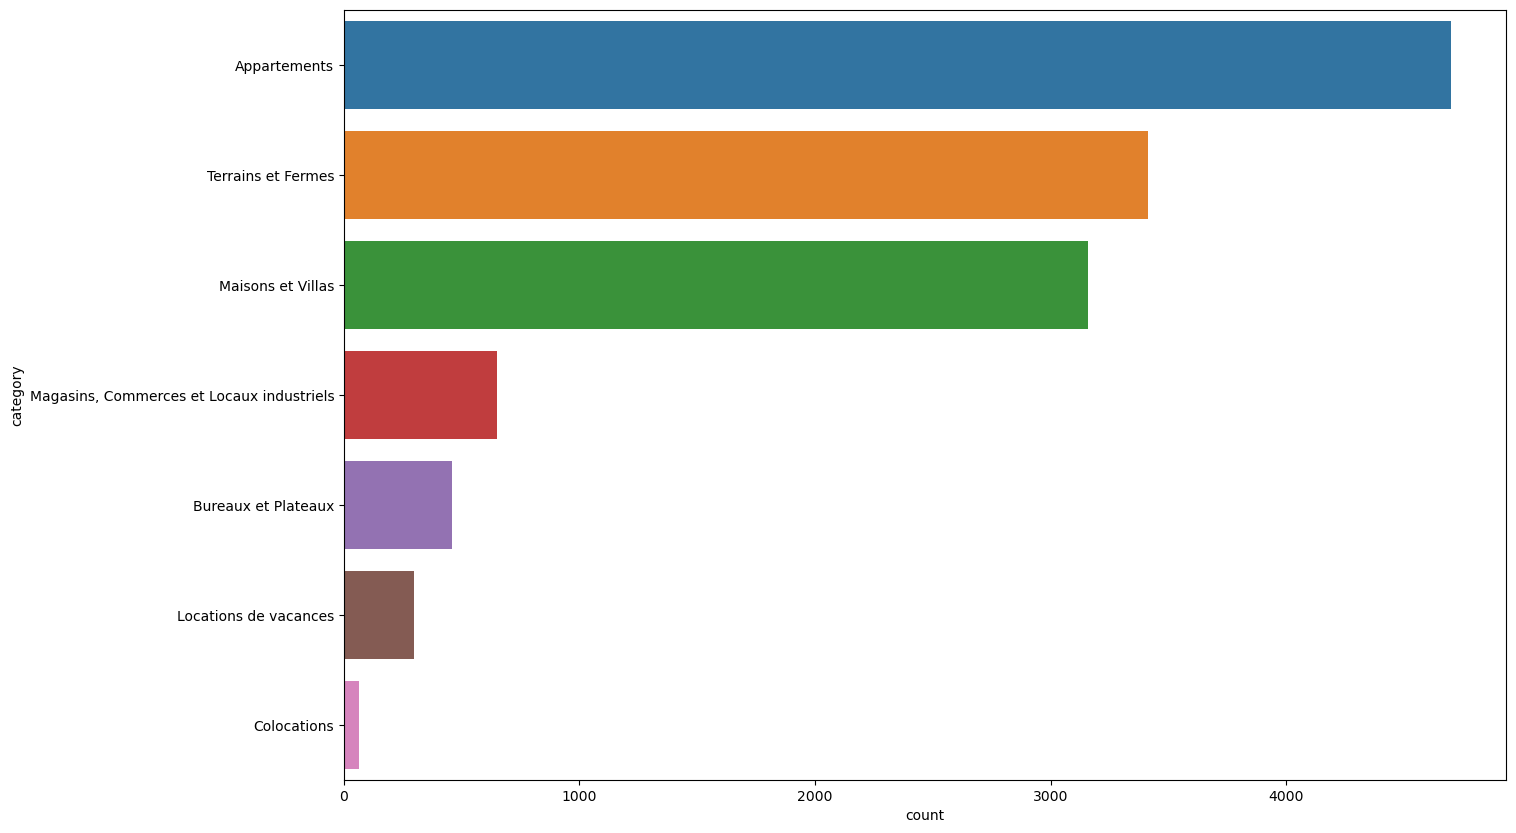

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(y='category', data=data, order=data.category.value_counts().index)

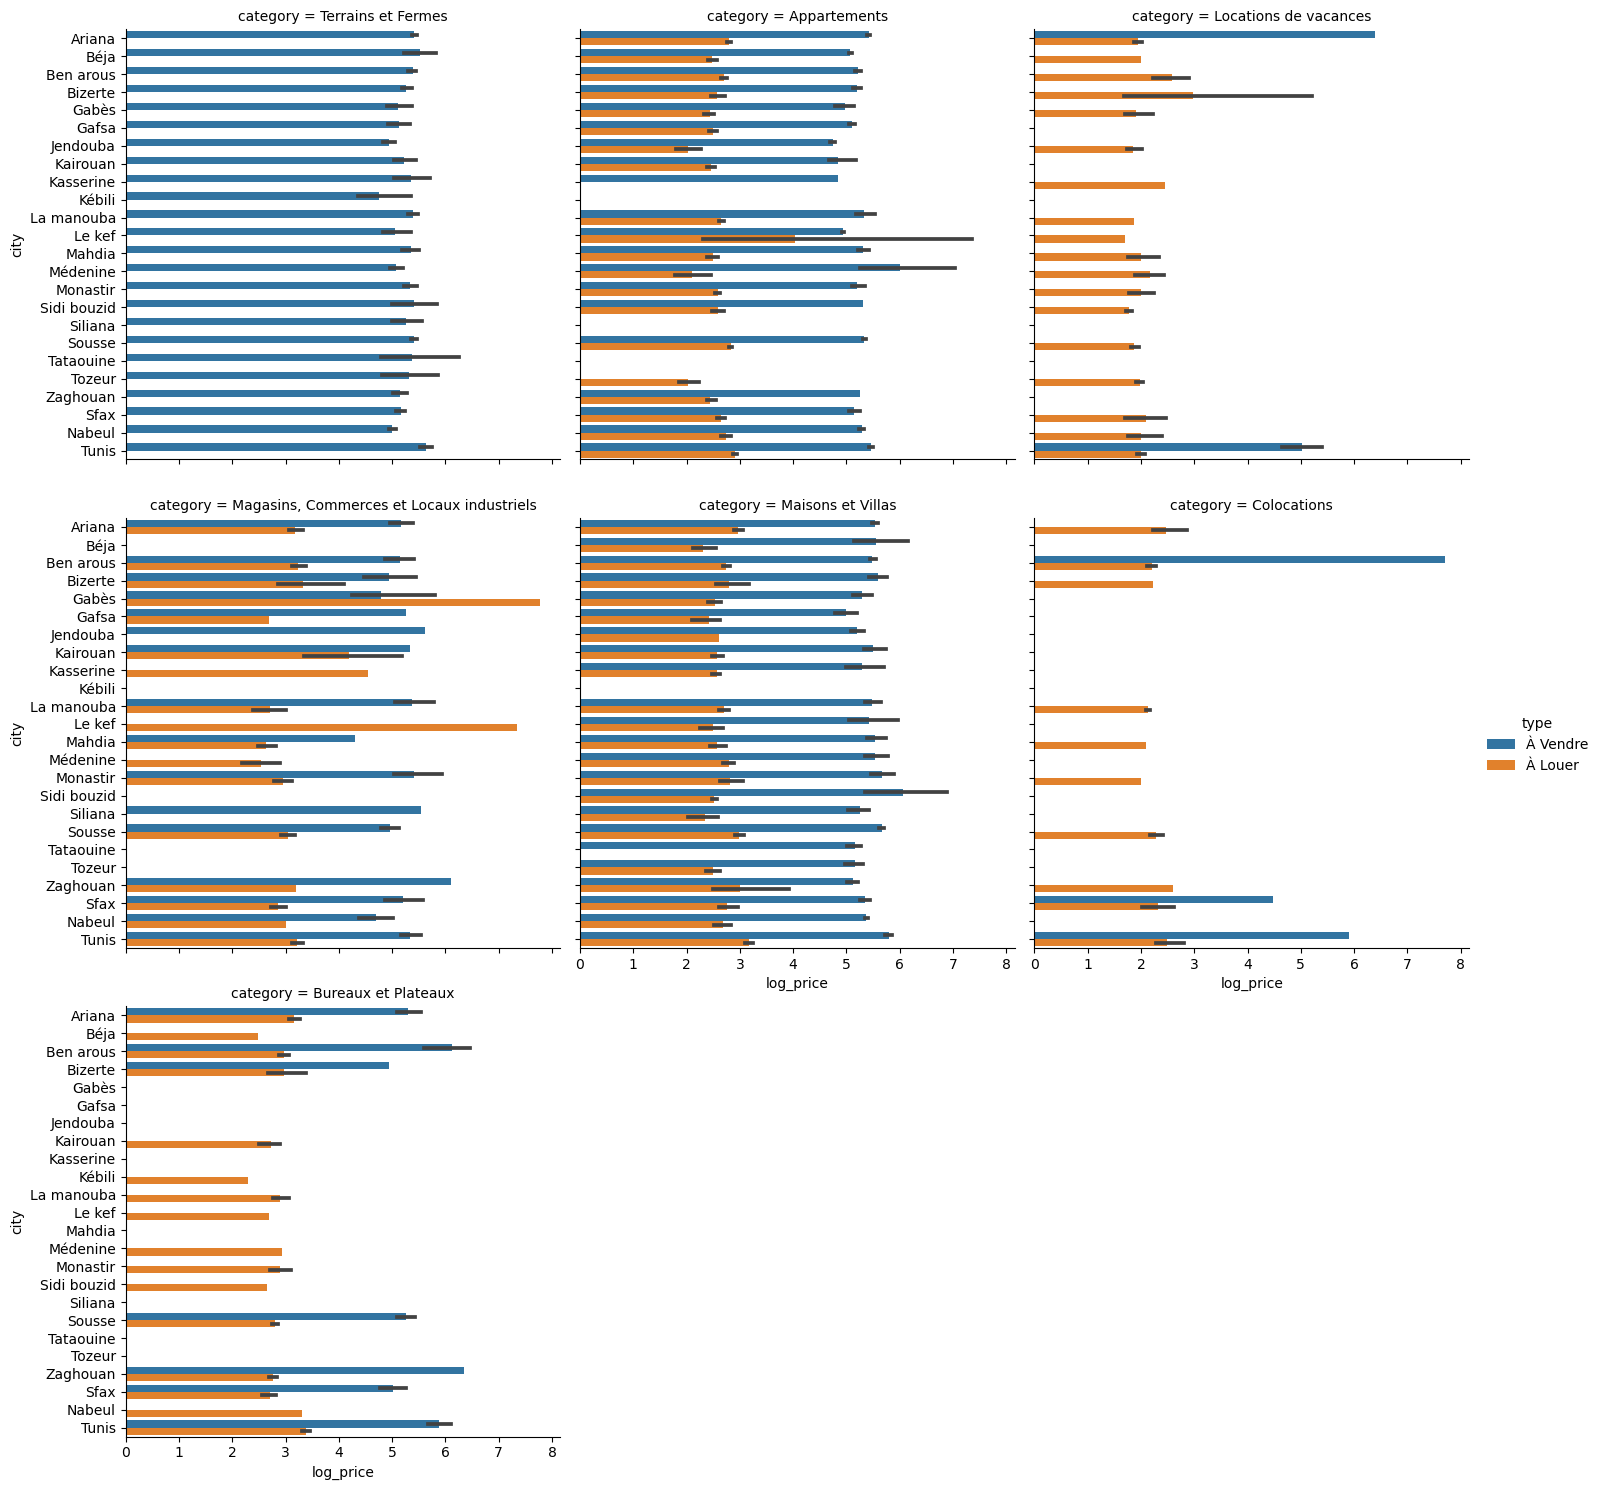

In [17]:
sns.catplot(data=data,x='log_price', y='city', hue='type', col='category',kind='bar', col_wrap=3)


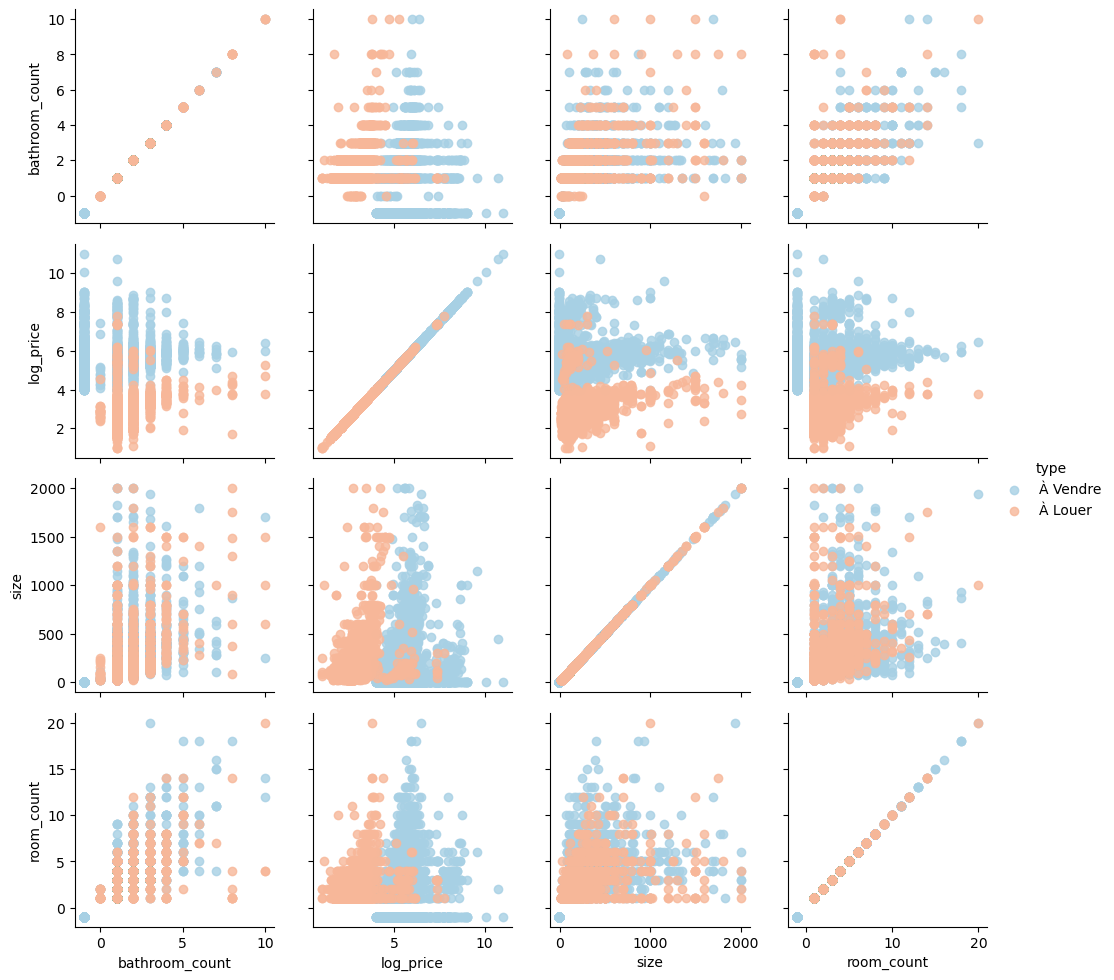

In [18]:
g = sns.PairGrid(data, vars=['bathroom_count', 'log_price', 'size', 'room_count'],
                 hue='type', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

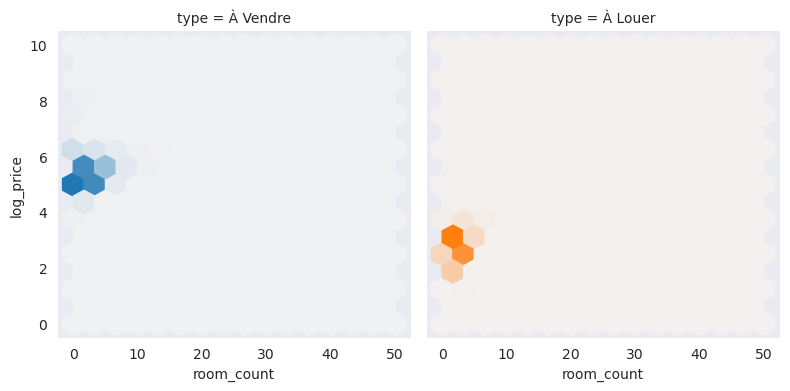

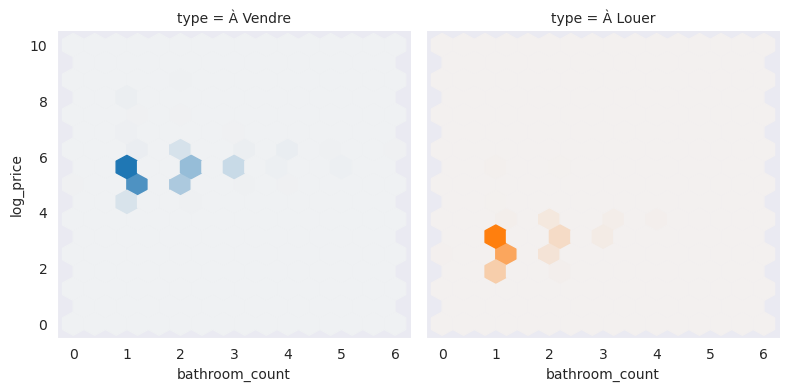

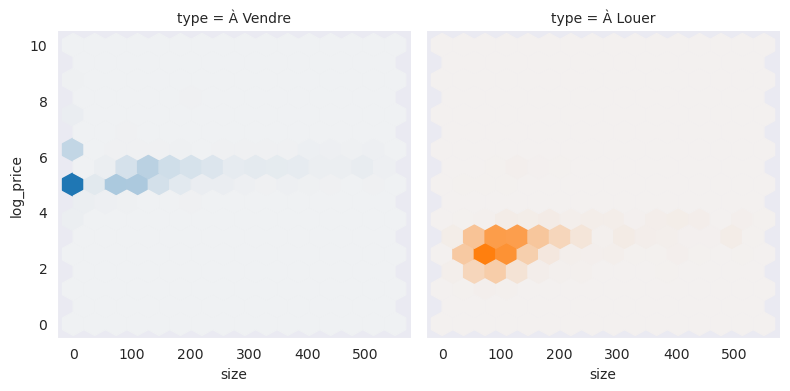

In [19]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g1 = sns.FacetGrid(data, hue="type", col="type", height=4)
    g2 = sns.FacetGrid(data, hue="type", col="type", height=4)
    g3 = sns.FacetGrid(data, hue="type", col="type", height=4)

g1.map(hexbin, "room_count", "log_price", extent=[0, 50, 0, 10]);
g2.map(hexbin, "bathroom_count", "log_price", extent=[0, 6, 0, 10]);
g3.map(hexbin, "size", "log_price", extent=[0, 550, 0, 10]);

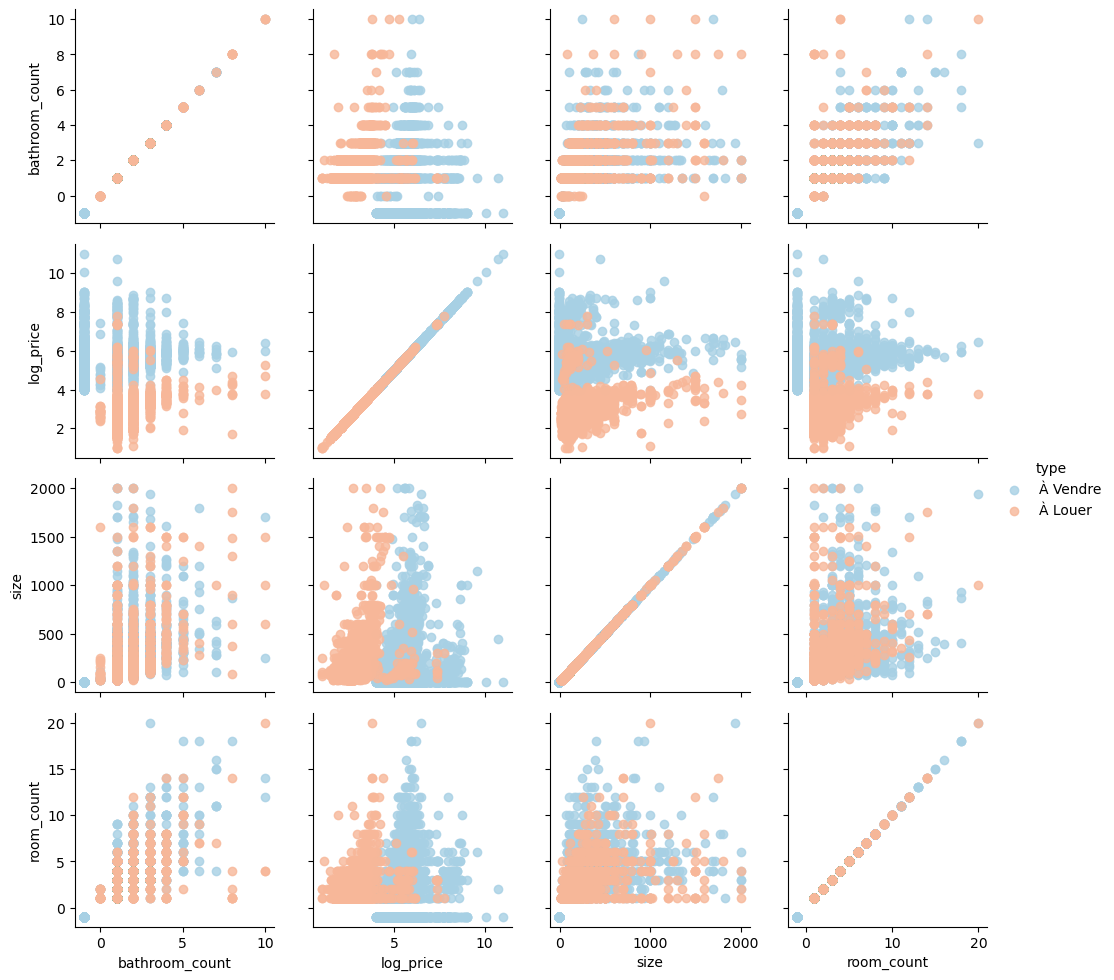

In [20]:
g = sns.PairGrid(data, vars=['bathroom_count', 'log_price', 'size', 'room_count'],
                 hue='type', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

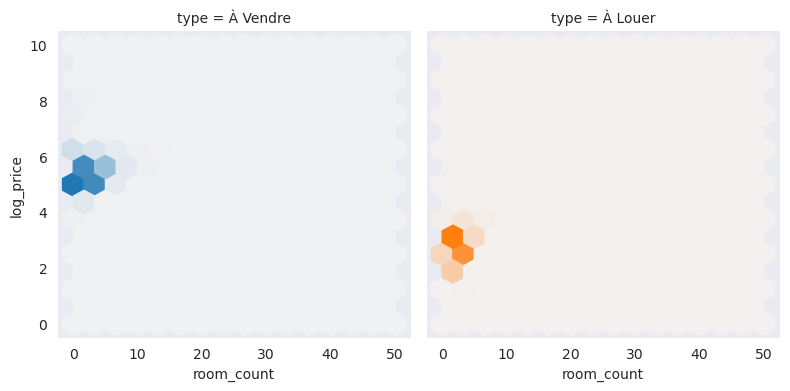

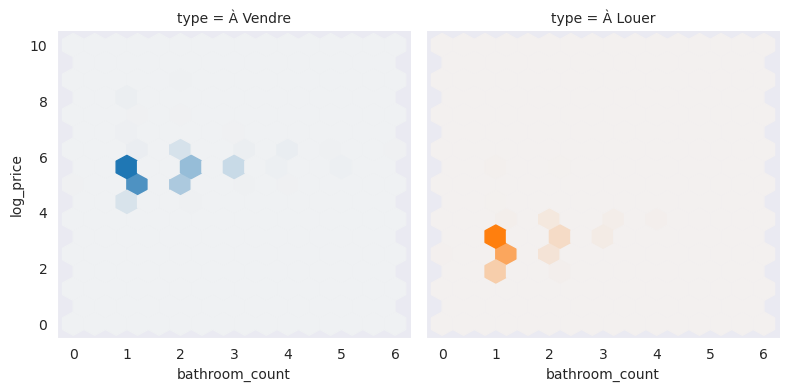

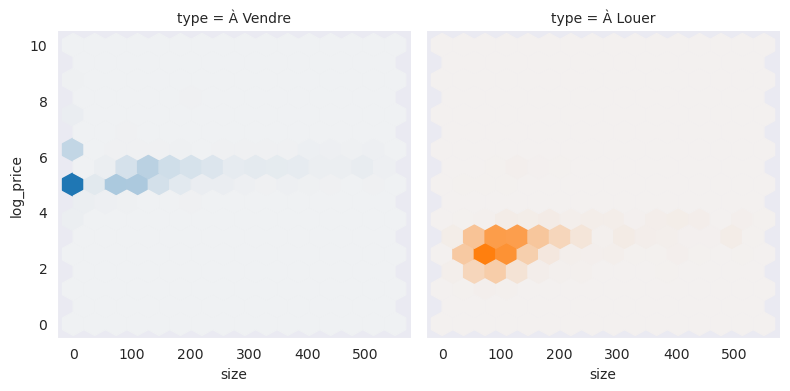

In [21]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g1 = sns.FacetGrid(data, hue="type", col="type", height=4)
    g2 = sns.FacetGrid(data, hue="type", col="type", height=4)
    g3 = sns.FacetGrid(data, hue="type", col="type", height=4)

g1.map(hexbin, "room_count", "log_price", extent=[0, 50, 0, 10]);
g2.map(hexbin, "bathroom_count", "log_price", extent=[0, 6, 0, 10]);
g3.map(hexbin, "size", "log_price", extent=[0, 550, 0, 10]);

In [22]:
data2 = pd.DataFrame()
data2['city'] = data.city.unique()
data2 = data2.sort_values('city')
data2["lat"] = ""
data2["long"] = ""
for i in range(0, len(data2)):
    if(data2.iloc[i]["city"]=="Tunis"):
        data2["lat"].iloc[i] = 36.806112
        data2["long"].iloc[i] = 10.171078
        
    elif(data2.iloc[i]["city"]=="Ariana"):
        data2["lat"].iloc[i] = 36.860117
        data2["long"].iloc[i] = 10.193371
        
    elif(data2.iloc[i]["city"]=="Ben arous"):
        data2["lat"].iloc[i] = 36.753056
        data2["long"].iloc[i] = 10.218889
        
    elif(data2.iloc[i]["city"]=="La manouba"):
        data2["lat"].iloc[i] = 36.808029
        data2["long"].iloc[i] = 10.097205
        
    elif(data2.iloc[i]["city"]=="Nabeul"):
        data2["lat"].iloc[i] = 36.456058
        data2["long"].iloc[i] = 10.73763
    
    elif(data2.iloc[i]["city"]=="Zaghouan"):
        data2["lat"].iloc[i] = 36.402907
        data2["long"].iloc[i] = 10.142925
        
    elif(data2.iloc[i]["city"]=="Bizerte"):
        data2["lat"].iloc[i] = 37.274423
        data2["long"].iloc[i] = 9.87391
        
    elif(data2.iloc[i]["city"]=="Béja"):
        data2["lat"].iloc[i] = 36.725638
        data2["long"].iloc[i] = 9.181692
    
    elif(data2.iloc[i]["city"]=="Jendouba"):
        data2["lat"].iloc[i] = 36.501136
        data2["long"].iloc[i] = 8.780239
    
    elif(data2.iloc[i]["city"]=="Le kef"):
        data2["lat"].iloc[i] = 36.174239
        data2["long"].iloc[i] = 8.704863
    
    elif(data2.iloc[i]["city"]=="Siliana"):
        data2["lat"].iloc[i] = 36.084966
        data2["long"].iloc[i] = 9.370818
    
    elif(data2.iloc[i]["city"]=="Sousse"):
        data2["lat"].iloc[i] = 35.825388
        data2["long"].iloc[i] = 10.636991
    
    elif(data2.iloc[i]["city"]=="Monastir"):
        data2["lat"].iloc[i] = 35.783333
        data2["long"].iloc[i] = 10.833333
    
    elif(data2.iloc[i]["city"]=="Mahdia"):
        data2["lat"].iloc[i] = 35.504722
        data2["long"].iloc[i] = 11.062222
    
    elif(data2.iloc[i]["city"]=="Sfax"):
        data2["lat"].iloc[i] = 34.740556
        data2["long"].iloc[i] = 10.760278
    
    elif(data2.iloc[i]["city"]=="Kairouan"):
        data2["lat"].iloc[i] = 35.678102
        data2["long"].iloc[i] = 10.096333
    
    elif(data2.iloc[i]["city"]=="Kasserine"):
        data2["lat"].iloc[i] = 35.167578
        data2["long"].iloc[i] = 8.836506
    
    elif(data2.iloc[i]["city"]=="Sidi bouzid"):
        data2["lat"].iloc[i] = 35.038234
        data2["long"].iloc[i] = 9.484935
    
    elif(data2.iloc[i]["city"]=="Gabès"):
        data2["lat"].iloc[i] = 33.881457
        data2["long"].iloc[i] = 10.098196
    
    elif(data2.iloc[i]["city"]=="Médenine"):
        data2["lat"].iloc[i] = 33.354947
        data2["long"].iloc[i] = 10.505478
    
    elif(data2.iloc[i]["city"]=="Tataouine"):
        data2["lat"].iloc[i] = 32.929674
        data2["long"].iloc[i] = 10.451767
    
    elif(data2.iloc[i]["city"]=="Gafsa"):
        data2["lat"].iloc[i] = 34.425
        data2["long"].iloc[i] = 8.784167
    
    elif(data2.iloc[i]["city"]=="Tozeur"):
        data2["lat"].iloc[i] = 33.919683
        data2["long"].iloc[i] = 8.13352
    
    else:
        data2["lat"].iloc[i] = 33.704387
        data2["long"].iloc[i] = 8.969034

data2.reset_index(drop=True, inplace=True)
data2['sum_room_count'] = data.groupby(['city'])['room_count'].sum().reset_index(name='sum_room_count')['sum_room_count']
data2['sum_bathroom_count'] = data.groupby(['city'])['bathroom_count'].sum().reset_index(name='sum_bathroom_count')['sum_bathroom_count']
data2['sum_size'] = data.groupby(['city'])['size'].sum().reset_index(name='sum_size')['sum_size']
data2['sum_log_price'] = data.groupby(['city'])['log_price'].sum().reset_index(name='sum_log_price')['sum_log_price']

data2['sum_À Vendre'] = data[data["type"]=='À Vendre'].groupby(['city'])['type'].count().reset_index(name='sum_À Vendre')['sum_À Vendre']

x=data[data["type"]=='À Louer'].groupby(['city'])['type'].count().reset_index(name='sum_À Louer')
for i in range (len(data.city.unique())):
    if(data.city.unique()[i] not in np.array(data[data["type"]=='À Louer'].groupby(['city'])['type'].count().reset_index(name='sum_À Louer')['city'])):
        x=x.append(pd.DataFrame([[data.city.unique()[i], 0]], columns=['city','sum_À Louer']),ignore_index=True)
x = x.sort_values('city')
x.reset_index(drop=True, inplace=True)
data2['sum_À Louer'] = x['sum_À Louer']
    
for c in (['Appartements', 'Bureaux et Plateaux', 'Colocations', 'Locations de vacances', 'Magasins, Commerces et Locaux industriels', 'Maisons et Villas', 'Terrains et Fermes' ]):
    x=data[data["category"]==c].groupby(['city'])['category'].count().reset_index(name='sum_'+c)
    for i in range (len(data.city.unique())):
        if(data.city.unique()[i] not in np.array(data[data["category"]==c].groupby(['city'])['category'].count().reset_index(name='sum_'+c)['city'])):
            x=x.append(pd.DataFrame([[data.city.unique()[i], 0]], columns=['city','sum_'+c]),ignore_index=True)
    x = x.sort_values('city')
    x.reset_index(drop=True, inplace=True)
    data2['sum_'+c] = x['sum_'+c]

data2 = data2.fillna(0)
num = data2._get_numeric_data()
num[num < 0] = 0

In [23]:
data2

,city,lat,long,sum_room_count,sum_bathroom_count,sum_size,sum_log_price,sum_À Vendre,sum_À Louer,sum_Appartements,sum_Bureaux et Plateaux,sum_Colocations,sum_Locations de vacances,"sum_Magasins, Commerces et Locaux industriels",sum_Maisons et Villas,sum_Terrains et Fermes
0,Ariana,36.860117,10.193371,4366.0,2050.0,316074.0,10436.583887,1425,949,1001,79,17,42,136,514,585
1,Ben arous,36.753056,10.218889,2593.0,1064.0,153892.0,4666.495799,596,527,422,38,7,12,86,368,190
2,Bizerte,37.274423,9.873910,496.0,67.0,36803.0,2177.284549,358,97,77,5,1,5,13,124,230
3,Béja,36.725638,9.181692,43.0,0.0,3798.0,309.285985,51,12,8,1,0,1,0,14,39
4,Gabès,33.881457,10.098196,285.0,92.0,19561.0,756.930163,109,82,40,0,0,23,4,55,69
5,Gafsa,34.425000,8.784167,85.0,0.0,7333.0,390.744969,66,22,15,0,0,0,2,23,48
6,Jendouba,36.501136,8.780239,133.0,28.0,8696.0,384.735678,66,26,11,0,0,13,1,25,42
7,Kairouan,35.678102,10.096333,160.0,27.0,14173.0,535.002584,83,33,16,3,0,0,8,36,53
8,Kasserine,35.167578,8.836506,69.0,1.0,7340.0,302.002837,54,5,1,0,0,1,1,23,33
9,Kébili,33.704387,8.969034,0.0,0.0,55.0,49.899711,10,1,0,1,0,0,0,0,10


In [24]:
m = folium.Map(location=[33.8869, 10], tiles='cartodbpositron', zoom_start=6)

for i in range(0, len(data2)):
    
    folium.Circle(
        location=[data2.iloc[i]['lat'], data2.iloc[i]['long']],
        color='crimson',
        tooltip =   '<li><bold>City : '+str(data2.iloc[i]['city'])+
                    '<li><bold>sum(log(Prices)) : '+str(data2.iloc[i]['sum_log_price'])+
                    '<li><bold>sum(For sale) : '+str(data2.iloc[i]['sum_À Vendre'])+
                    '<li><bold>sum(For rent) : '+str(data2.iloc[i]['sum_À Louer'])+
                    '<li><bold>sum(Apartments) : '+str(data2.iloc[i]['sum_Appartements'])+
                    '<li><bold>sum(Offices) : '+str(data2.iloc[i]['sum_Bureaux et Plateaux'])+
                    '<li><bold>sum(Shared flat) : '+str(data2.iloc[i]['sum_Colocations'])+
                    '<li><bold>sum(Holiday rents) : '+str(data2.iloc[i]['sum_Locations de vacances'])+
                    '<li><bold>sum(Shops, Stores and Industrial) : '+str(data2.iloc[i]['sum_Magasins, Commerces et Locaux industriels'])+
                    '<li><bold>sum(Houses and Villas) : '+str(data2.iloc[i]['sum_Maisons et Villas'])+
                    '<li><bold>sum(Land and Farms) : '+str(data2.iloc[i]['sum_Terrains et Fermes'])+
                    '<li><bold>sum(Rooms) : '+str(data2.iloc[i]['sum_room_count'])+
                    '<li><bold>sum(Bathrooms) : '+str(data2.iloc[i]['sum_bathroom_count'])+
                    '<li><bold>sum(Size) : '+str(data2.iloc[i]['sum_size']),
        
        radius=int(data2.iloc[i]['sum_log_price'])**1).add_to(m)
    
m